In [2]:
import os
import sys
sys.path.append('../reconstruct_missing_data')

from pathlib import Path
from json import dump, load

from data_loading import (
    clone_data, 
    create_missing_mask, 
    split_and_scale_data,
)

import numpy as np
import xarray as xr
import scipy as sp
from matplotlib import pyplot as plt
from pathlib import Path
from json import dump, load
import os

# # Next block for visualization, only if packages are pre-installed!
# import xarray as xr
# import hvplot.xarray
# import geoviews as gv
# import cartopy
# import cartopy.crs as ccrs
# import cmocean

In [3]:
# Set working directory, according to working directory in scripts:
os.chdir('/gxfs_work1/geomar/smomw511') # nesh
# os.chdir('/Users/mlandt-hayen') # local
# os.chdir('/work') # local in Docker Container

In [5]:
## Specify parameters:

# Set path to data: Subset of cat images prepared as numpy array.
path_to_data = "GitHub/MarcoLandtHayen/reconstruct_missing_data/data/raw"

# Source: 
source = 'cats_1300'

In [6]:
# Load data:
data = np.load(path_to_data + '/' + source + '.npy')

In [8]:
# Get mean cat:
data_mean = np.mean(data,axis=0)

In [10]:
# De-mean data:
data_demean = data - data_mean

In [15]:
# Flatten data: Only keep sample dimension.
data_flat = np.reshape(data_demean,(data_demean.shape[0],-1))

In [17]:
## Perform SVD on flat data (de-meaned):

pc_cats, s_cats, eof_cats = sp.linalg.svd(
    data_flat, full_matrices=False
)

print("pc shape: ", pc_cats.shape)
print("s shape: ", s_cats.shape)
print("eof shape: ", eof_cats.shape)

pc shape:  (1300, 1300)
s shape:  (1300,)
eof shape:  (1300, 20736)


In [18]:
# Compute explained variance from singular values:
exp_var_cats = s_cats**2 / (s_cats**2).sum()

## Get accumulated explained variance:

# Initialize storage:
exp_var_acc_cats = np.zeros(exp_var_cats.shape)

# # Run over array of explained variance:
for i in range(len(exp_var_cats)):
    
    # First step to initialize accumulated variance:
    if i == 0:
        exp_var_acc_cats[i] = exp_var_cats[i]
    else:
        exp_var_acc_cats[i] = exp_var_acc_cats[i-1] + exp_var_cats[i]

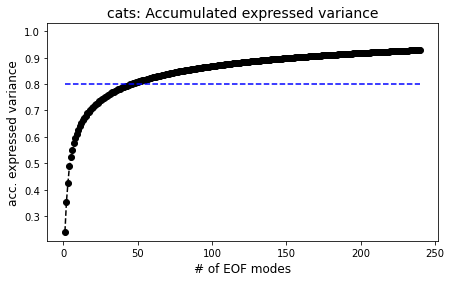

In [21]:
## Plot accumulated expressed variance over EOF modes.

fig, axes = plt.subplots(1,1,figsize=(7,4))

axes.plot(np.arange(0,len(exp_var_acc_cats[:240]),step=1)+1, exp_var_acc_cats[:240], color='black', marker='o', linestyle='--')
# Optionally add threshold:
axes.plot(np.arange(0,len(exp_var_acc_cats[:240]),step=1)+1, np.ones(len(exp_var_acc_cats[:240]))*0.8, color='blue', linestyle='--')

axes.set_ylim(top=1.03)
axes.set_title('cats: Accumulated expressed variance', fontsize=14)
axes.set_xlabel('# of EOF modes', fontsize=12)
axes.set_ylabel('acc. expressed variance', fontsize=12)
#axes.legend()
plt.show() 

In [20]:
exp_var_acc_cats[:50]

array([0.24074371, 0.35412915, 0.42416231, 0.48778894, 0.52301903,
       0.55175367, 0.57563161, 0.59606759, 0.61200274, 0.62634031,
       0.6402924 , 0.65303445, 0.66302041, 0.67224371, 0.68075157,
       0.68858836, 0.6958189 , 0.70228535, 0.70842802, 0.71435252,
       0.72005756, 0.7252664 , 0.7301692 , 0.73484306, 0.73939832,
       0.74378986, 0.74774955, 0.75145096, 0.75502553, 0.75855566,
       0.76194692, 0.7652982 , 0.76835962, 0.77138939, 0.77432047,
       0.77714456, 0.77983087, 0.7824498 , 0.78505746, 0.78754777,
       0.78996521, 0.79229505, 0.79450388, 0.79666843, 0.79878112,
       0.80082862, 0.80284487, 0.80478959, 0.80671105, 0.80859867])